# Analyzing ROMS Output
In this notebook, we analyze some output from ROMS.

In [1]:
from roms_tools import Grid, ROMSOutput

For our analysis, we require information about the grid used in the model. We retrieve the grid data using the `Grid.from_file ` method.

In [2]:
grid = Grid.from_file(
    "/global/cfs/cdirs/m4746/Users/elizabeth/EASTPAC25KM/INPUT_FIXED_TOPO/epac25km_grd.nc"
)

WARNING - Vertical coordinates (Cs_r, Cs_w) not found in grid file.
INFO - === Preparing the vertical coordinate system using N = 100, theta_s = 5.0, theta_b = 2.0, hc = 300.0 ===
INFO - Total time: 0.003 seconds
INFO - ========================================================================================================


## Reading in ROMS output data

The `ROMSOutput` class provides a flexible way to load ROMS output files using the `path` parameter, which can be specified in the following ways: 

1. **Single file**: If `path` is a single file, only that file will be loaded.
2. **List of files**: If `path` is a list of file paths, the specified files will be loaded in the given order.
3. **Wildcards**: If `path` contains wildcards (e.g., `*rst*.nc`), matching files are loaded in lexicographic order, assuming this reflects the correct temporal sequence (as is the case for standard ROMS output).

For cases 2 and 3, ROMS-Tools will attempt to concatenate the files along the time dimension. If this is not possible (e.g., due to inconsistent dimensions or metadata), an error may be thrown. 

In the following example, we will read restart files generated during a ROMS simulation. 

### Reading a single file

In [3]:
%%time

roms_output_from_single_file = ROMSOutput(
    grid=grid,
    path="/global/cfs/cdirs/m4746/Users/elizabeth/EASTPAC25KM_Jan1998/output_combined/eastpac25km_rst.19980106000000.nc",
    use_dask=True,
)

/global/cfs/cdirs/m4746/Users/nora/roms-tools/roms_tools/utils.py:142: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  ds = xr.open_mfdataset(


CPU times: user 369 ms, sys: 209 ms, total: 577 ms
Wall time: 2.99 s


<div class="alert alert-info">

Note

In the cell above, we read our ROMS output files with `use_dask = True`. This enables `Dask`, a Python library designated to facilitate scalable, out-of-memory data processing by distributing computations across multiple threads or processes. [Here](https://roms-tools.readthedocs.io/en/latest/using_dask.html) you can learn more about using `Dask` with `ROMS-Tools`.

</div>

The `.ds` attribute contains an `xarray.Dataset` with the data that was read in. As you can see, the restart file contains two time stamps (10 minutes apart).

In [4]:
roms_output_from_single_file.ds

<xarray.Dataset> Size: 1GB
Dimensions:                (time: 2, auxil: 6, eta_rho: 162, xi_rho: 122,
                            xi_u: 121, eta_v: 161, s_rho: 100)
Coordinates:
    abs_time               (time) datetime64[ns] 16B 1998-01-05T23:50:00 1998...
    lon_rho                (eta_rho, xi_rho) float64 158kB ...
    lat_rho                (eta_rho, xi_rho) float64 158kB ...
Dimensions without coordinates: time, auxil, eta_rho, xi_rho, xi_u, eta_v, s_rho
Data variables: (12/55)
    ocean_time             (time) float64 16B dask.array<chunksize=(1,), meta=np.ndarray>
    time_step              (time, auxil) int32 48B dask.array<chunksize=(1, 6), meta=np.ndarray>
    zeta                   (time, eta_rho, xi_rho) float64 316kB dask.array<chunksize=(1, 162, 122), meta=np.ndarray>
    ubar                   (time, eta_rho, xi_u) float64 314kB dask.array<chunksize=(1, 162, 121), meta=np.ndarray>
    vbar                   (time, eta_v, xi_rho) float64 314kB dask.array<chunksize=(1, 161, 122), meta=np.ndarray>
    MARBL_PH_3D            (time, s_rho, eta_rho, xi_rho) float64 32MB dask.array<chunksize=(1, 100, 162, 122), meta=np.ndarray>
    ...                     ...
    DV_avg_bak             (time, eta_v, xi_rho) float64 314kB dask.array<chunksize=(1, 161, 122), meta=np.ndarray>
    hbls                   (time, eta_rho, xi_rho) float64 316kB dask.array<chunksize=(1, 162, 122), meta=np.ndarray>
    hbbl                   (time, eta_rho, xi_rho) float64 316kB dask.array<chunksize=(1, 162, 122), meta=np.ndarray>
    u_slow                 (time, s_rho, eta_rho, xi_u) float64 31MB dask.array<chunksize=(1, 100, 162, 121), meta=np.ndarray>
    v_slow                 (time, s_rho, eta_v, xi_rho) float64 31MB dask.array<chunksize=(1, 100, 161, 122), meta=np.ndarray>
    p_slow                 (time, s_rho, eta_rho, xi_rho) float64 32MB dask.array<chunksize=(1, 100, 162, 122), meta=np.ndarray>
Attributes: (12/35)
    title:                 eastpac25km , 25km resolution
    grid_file:             /pscratch/sd/e/eay/EASTPAC25KM/INPUT_FIXED_TOPO/ep...
    init_file:             /pscratch/sd/e/eay/EASTPAC25KM_spinup/output/eastp...
    ntimes:                4610
    ndtfast:               45
    dt:                    600.0
    ...                    ...
    SRCS:                  SRCS $(shell ls *$(UPF77_ext)) SRCS : $(filter-out...
    CPPS:                  <cppdefs.opt> PACIFIC_PD SOLVE3D UV_ADV UV_COR ADV...
    surf_forcing_strings:  
    bc_options:             OBC_WEST, OBC_NORTH, OBC_SOUTH, OBC_M3ORLANSKI, O...
    git_version:           
    type:                  ROMS restart file

### Reading multiple files

In [5]:
%%time

roms_output_from_two_files = ROMSOutput(
    grid=grid,
    path=[
        "/global/cfs/cdirs/m4746/Users/elizabeth/EASTPAC25KM_Jan1998/output_combined/eastpac25km_rst.19980106000000.nc",
        "/global/cfs/cdirs/m4746/Users/elizabeth/EASTPAC25KM_Jan1998/output_combined/eastpac25km_rst.20010201000000.nc",
    ],
    use_dask=True,
)

CPU times: user 65.1 ms, sys: 27.2 ms, total: 92.2 ms
Wall time: 272 ms


The two specified restart files were concatenated into a single `xarray.Dataset`, which now contains 4 time stamps.

In [6]:
roms_output_from_two_files.ds

<xarray.Dataset> Size: 3GB
Dimensions:                (time: 4, auxil: 6, eta_rho: 162, xi_rho: 122,
                            xi_u: 121, eta_v: 161, s_rho: 100)
Coordinates:
    abs_time               (time) datetime64[ns] 32B 1998-01-05T23:50:00 ... ...
    lon_rho                (eta_rho, xi_rho) float64 158kB ...
    lat_rho                (eta_rho, xi_rho) float64 158kB ...
Dimensions without coordinates: time, auxil, eta_rho, xi_rho, xi_u, eta_v, s_rho
Data variables: (12/55)
    ocean_time             (time) float64 32B dask.array<chunksize=(1,), meta=np.ndarray>
    time_step              (time, auxil) int32 96B dask.array<chunksize=(1, 6), meta=np.ndarray>
    zeta                   (time, eta_rho, xi_rho) float64 632kB dask.array<chunksize=(1, 162, 122), meta=np.ndarray>
    ubar                   (time, eta_rho, xi_u) float64 627kB dask.array<chunksize=(1, 162, 121), meta=np.ndarray>
    vbar                   (time, eta_v, xi_rho) float64 629kB dask.array<chunksize=(1, 161, 122), meta=np.ndarray>
    MARBL_PH_3D            (time, s_rho, eta_rho, xi_rho) float64 63MB dask.array<chunksize=(1, 100, 162, 122), meta=np.ndarray>
    ...                     ...
    DV_avg_bak             (time, eta_v, xi_rho) float64 629kB dask.array<chunksize=(1, 161, 122), meta=np.ndarray>
    hbls                   (time, eta_rho, xi_rho) float64 632kB dask.array<chunksize=(1, 162, 122), meta=np.ndarray>
    hbbl                   (time, eta_rho, xi_rho) float64 632kB dask.array<chunksize=(1, 162, 122), meta=np.ndarray>
    u_slow                 (time, s_rho, eta_rho, xi_u) float64 63MB dask.array<chunksize=(1, 100, 162, 121), meta=np.ndarray>
    v_slow                 (time, s_rho, eta_v, xi_rho) float64 63MB dask.array<chunksize=(1, 100, 161, 122), meta=np.ndarray>
    p_slow                 (time, s_rho, eta_rho, xi_rho) float64 63MB dask.array<chunksize=(1, 100, 162, 122), meta=np.ndarray>
Attributes: (12/35)
    title:                 eastpac25km , 25km resolution
    grid_file:             /pscratch/sd/e/eay/EASTPAC25KM/INPUT_FIXED_TOPO/ep...
    init_file:             /pscratch/sd/e/eay/EASTPAC25KM_spinup/output/eastp...
    ntimes:                4610
    ndtfast:               45
    dt:                    600.0
    ...                    ...
    SRCS:                  SRCS $(shell ls *$(UPF77_ext)) SRCS : $(filter-out...
    CPPS:                  <cppdefs.opt> PACIFIC_PD SOLVE3D UV_ADV UV_COR ADV...
    surf_forcing_strings:  
    bc_options:             OBC_WEST, OBC_NORTH, OBC_SOUTH, OBC_M3ORLANSKI, O...
    git_version:           
    type:                  ROMS restart file

### Reading files with wildcards

In [7]:
%%time

roms_output = ROMSOutput(
    grid=grid,
    path="/global/cfs/cdirs/m4746/Users/elizabeth/EASTPAC25KM_Jan1998/output_combined/*rst*.nc",
    use_dask=True,
)

CPU times: user 12.6 s, sys: 2.95 s, total: 15.6 s
Wall time: 52.2 s


The specified directory contains 222 restart files, all of which were concatenated into one dataset. (The concatenation takes some time, even though we used `use_dask = True`.)

In [8]:
roms_output.ds

<xarray.Dataset> Size: 288GB
Dimensions:                (time: 444, auxil: 6, eta_rho: 162, xi_rho: 122,
                            xi_u: 121, eta_v: 161, s_rho: 100)
Coordinates:
    abs_time               (time) datetime64[ns] 4kB 1998-01-05T23:50:00 ... ...
    lon_rho                (eta_rho, xi_rho) float64 158kB ...
    lat_rho                (eta_rho, xi_rho) float64 158kB ...
Dimensions without coordinates: time, auxil, eta_rho, xi_rho, xi_u, eta_v, s_rho
Data variables: (12/55)
    ocean_time             (time) float64 4kB dask.array<chunksize=(1,), meta=np.ndarray>
    time_step              (time, auxil) int32 11kB dask.array<chunksize=(1, 6), meta=np.ndarray>
    zeta                   (time, eta_rho, xi_rho) float64 70MB dask.array<chunksize=(1, 162, 122), meta=np.ndarray>
    ubar                   (time, eta_rho, xi_u) float64 70MB dask.array<chunksize=(1, 162, 121), meta=np.ndarray>
    vbar                   (time, eta_v, xi_rho) float64 70MB dask.array<chunksize=(1, 161, 122), meta=np.ndarray>
    MARBL_PH_3D            (time, s_rho, eta_rho, xi_rho) float64 7GB dask.array<chunksize=(1, 100, 162, 122), meta=np.ndarray>
    ...                     ...
    DV_avg_bak             (time, eta_v, xi_rho) float64 70MB dask.array<chunksize=(1, 161, 122), meta=np.ndarray>
    hbls                   (time, eta_rho, xi_rho) float64 70MB dask.array<chunksize=(1, 162, 122), meta=np.ndarray>
    hbbl                   (time, eta_rho, xi_rho) float64 70MB dask.array<chunksize=(1, 162, 122), meta=np.ndarray>
    u_slow                 (time, s_rho, eta_rho, xi_u) float64 7GB dask.array<chunksize=(1, 100, 162, 121), meta=np.ndarray>
    v_slow                 (time, s_rho, eta_v, xi_rho) float64 7GB dask.array<chunksize=(1, 100, 161, 122), meta=np.ndarray>
    p_slow                 (time, s_rho, eta_rho, xi_rho) float64 7GB dask.array<chunksize=(1, 100, 162, 122), meta=np.ndarray>
Attributes: (12/35)
    title:                 eastpac25km , 25km resolution
    grid_file:             /pscratch/sd/e/eay/EASTPAC25KM/INPUT_FIXED_TOPO/ep...
    init_file:             /pscratch/sd/e/eay/EASTPAC25KM_spinup/output/eastp...
    ntimes:                4610
    ndtfast:               45
    dt:                    600.0
    ...                    ...
    SRCS:                  SRCS $(shell ls *$(UPF77_ext)) SRCS : $(filter-out...
    CPPS:                  <cppdefs.opt> PACIFIC_PD SOLVE3D UV_ADV UV_COR ADV...
    surf_forcing_strings:  
    bc_options:             OBC_WEST, OBC_NORTH, OBC_SOUTH, OBC_M3ORLANSKI, O...
    git_version:           
    type:                  ROMS restart file

Let's verify that the time dimension has been concatenated in a linear sequence.

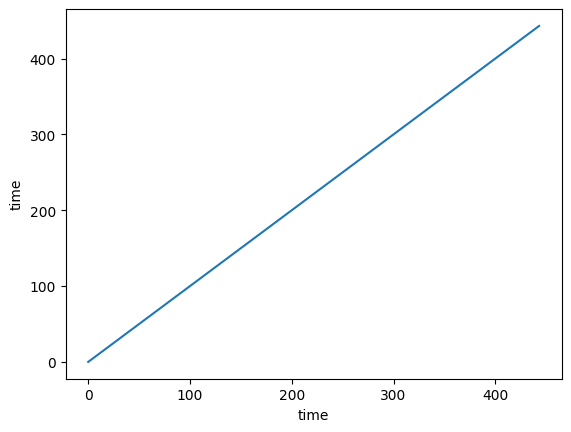

In [9]:
roms_output.ds.time.plot()

## Plotting ROMS output data
We can plot our ROMS data on
1. its **native** dimensions (`s`, `eta` , `xi`)
2. **lat/lon/depth** coordinates
3. a combination of 1. and 2., where

  * the horizontal native dimensions `eta` and `xi` **cannot be combined** with the horizontal coordinates `lat` and `lon`
  * the vertical native dimension `s` **cannot be combined** with the vertical coordinate `depth`.

We will demonstrate these three cases below.

### Plotting on the native model grid

Now, let's visualize our ROMS model output on its native grid. To start, here is a depiction of the horizontal grid, highlighting the two horizontal dimensions: `eta` ($\eta$) and `xi` ($\xi$).

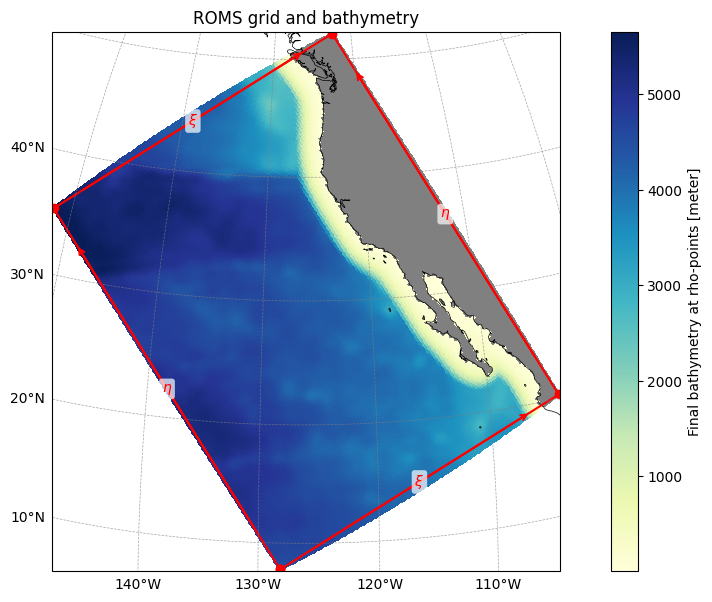

In [10]:
grid.plot(with_dim_names=True)

To plot ROMS output on its native grid, we can specify horizontal or vertical slices by specifying combinations of (`eta`, `xi`, `s`)—the three primary dimensions in ROMS. 

First, let's plot the surface pH at the earliest available time step. We define a horizontal slice by setting the `s` parameter.

[########################################] | 100% Completed | 101.11 ms


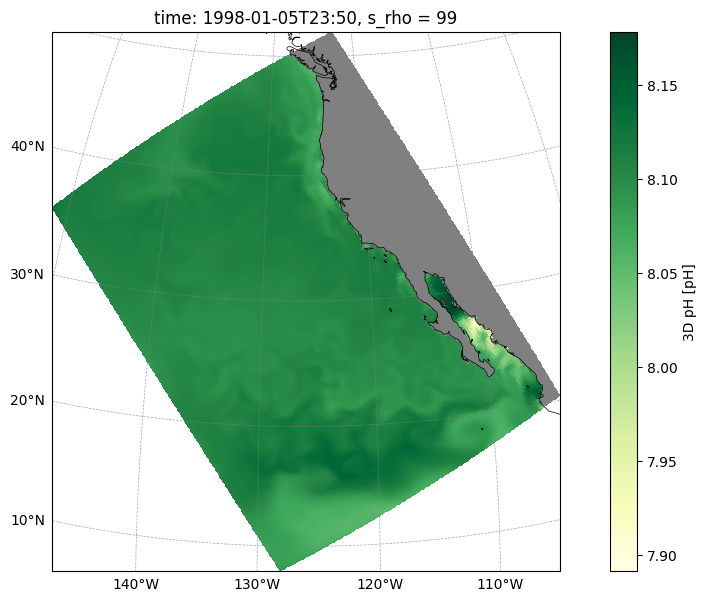

In [11]:
roms_output.plot(
    "MARBL_PH_3D", s=-1, time=0
)  # last or uppermost layer, first available time stamp

Next, we slice along the `eta` dimension.

[########################################] | 100% Completed | 101.33 ms


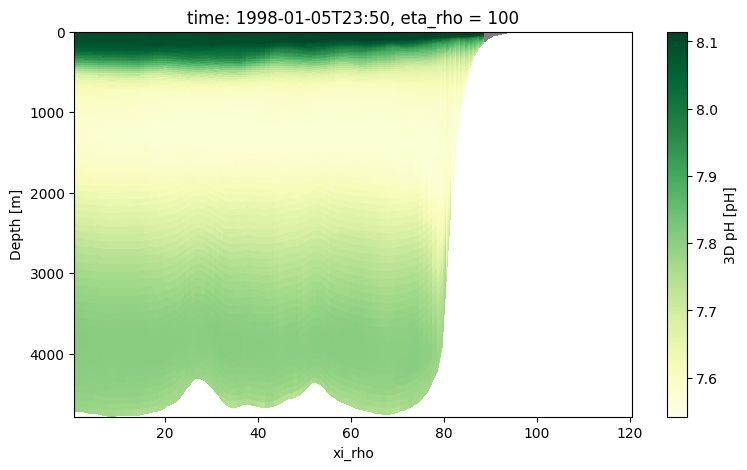

In [12]:
roms_output.plot("MARBL_PH_3D", eta=100, time=0)  # first available time stamp

Now we plot DIC at the surface at the 10th available time step.

[########################################] | 100% Completed | 201.77 ms


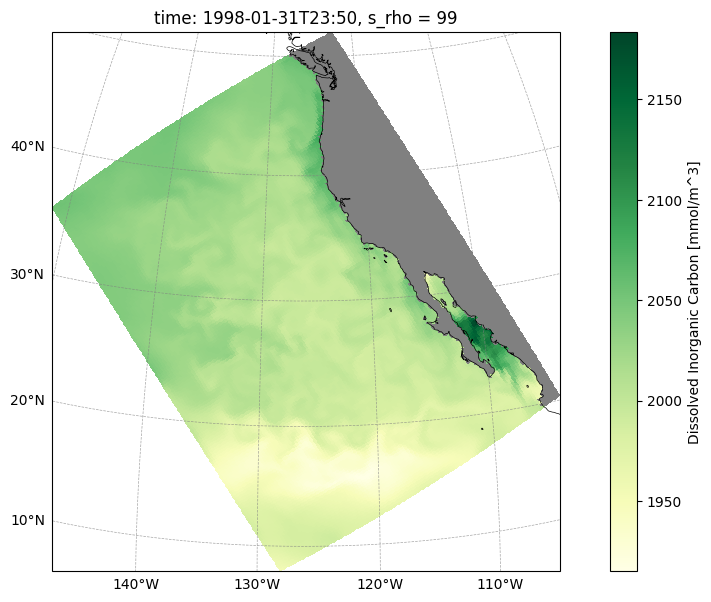

In [13]:
roms_output.plot("DIC", time=10, s=-1)  # uppermost layer, 10th available time stamp

We can also plot DIC in the bottom layer. Note that the bottom layer spans many different depths as shown by the depth contours.

[########################################] | 100% Completed | 101.32 ms


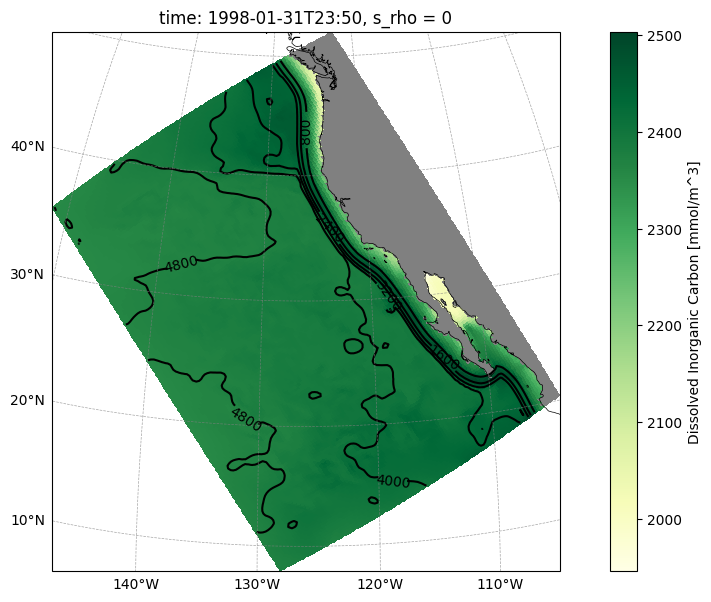

In [14]:
roms_output.plot(
    "DIC", time=10, s=0, depth_contours=True
)  # bottom layer, 10th available time stamp

Here is a plot of zonal velocity.

[########################################] | 100% Completed | 101.43 ms


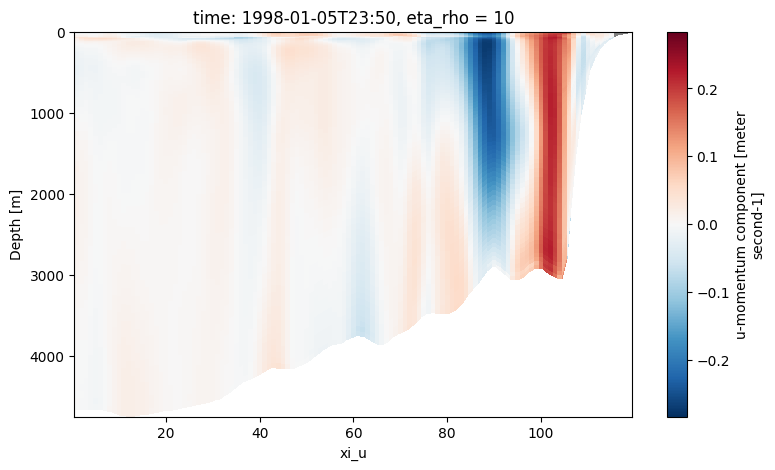

In [15]:
roms_output.plot("u", time=0, eta=10)

Or we can look at the depth profile of our favorite variable, this time sliced along the horizontal dimensions of the ROMS native grid.

[########################################] | 100% Completed | 202.59 ms


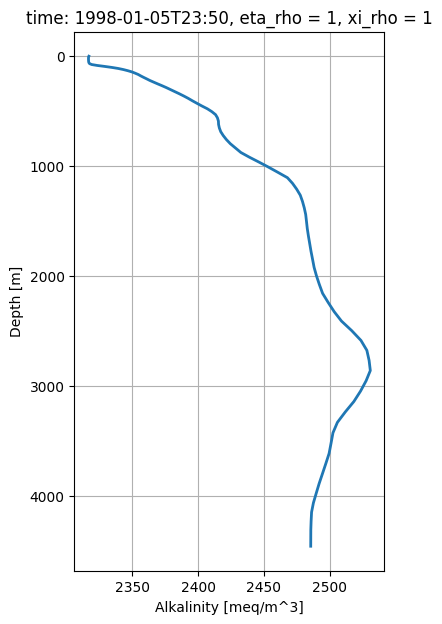

In [16]:
roms_output.plot("ALK", time=0, xi=1, eta=1)

We can also plot the spatial variability of alkalinity (or any other variable) for a specified layer and `eta` (or `xi`) slice.

[########################################] | 100% Completed | 101.34 ms


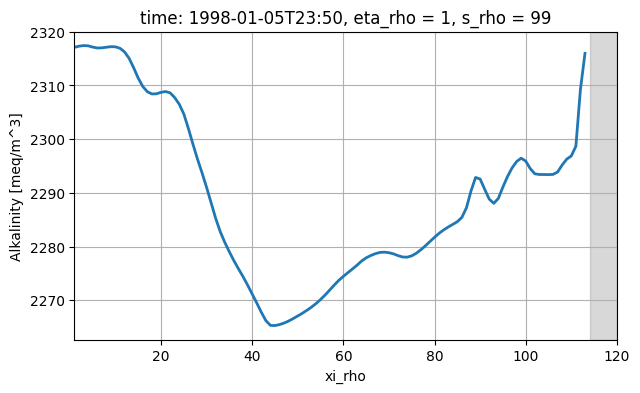

In [17]:
roms_output.plot("ALK", time=0, s=-1, eta=1)

### Plotting in lat/lon/depth coordinates

Let's now make a few plots in lat/lon/depth coordinates.

[########################################] | 100% Completed | 101.50 ms


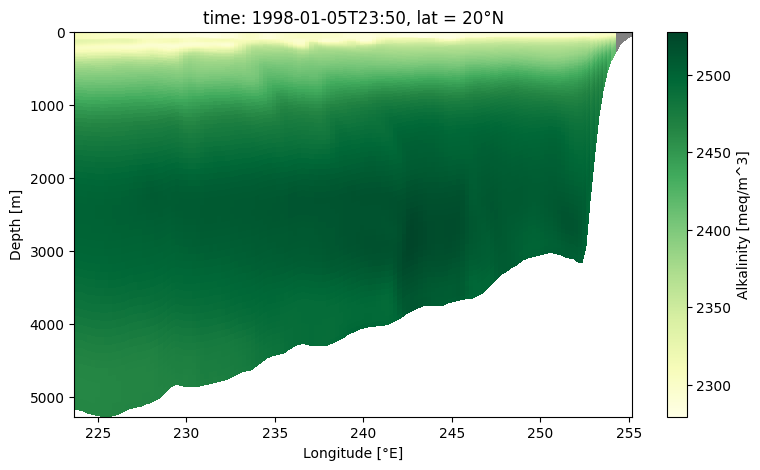

In [18]:
roms_output.plot("ALK", time=0, lat=20)

[########################################] | 100% Completed | 104.86 ms


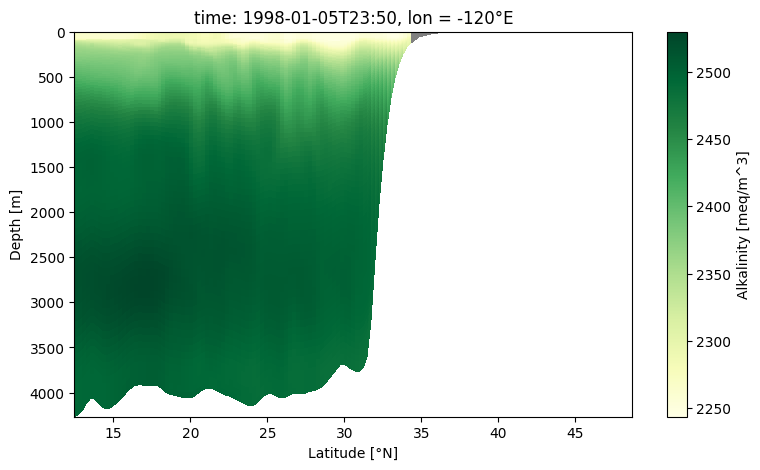

In [19]:
roms_output.plot("ALK", time=0, lon=-120)  # first available time stamp

[########################################] | 100% Completed | 101.38 ms


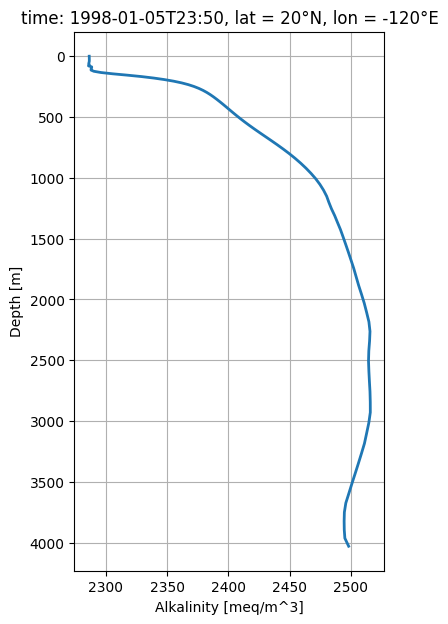

In [21]:
roms_output.plot("ALK", time=0, lat=20, lon=-120)  # first available time stamp

### Plotting in native and lat/lon/depth coordinates combined

[########################################] | 100% Completed | 101.53 ms


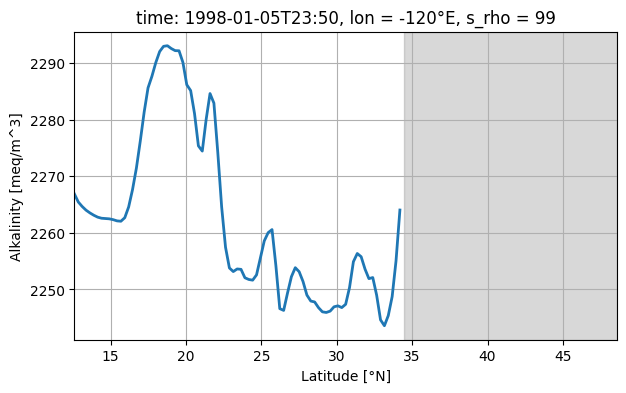

In [22]:
roms_output.plot("ALK", time=0, lon=-120, s=-1)  # first available time stamp

[########################################] | 100% Completed | 101.27 ms


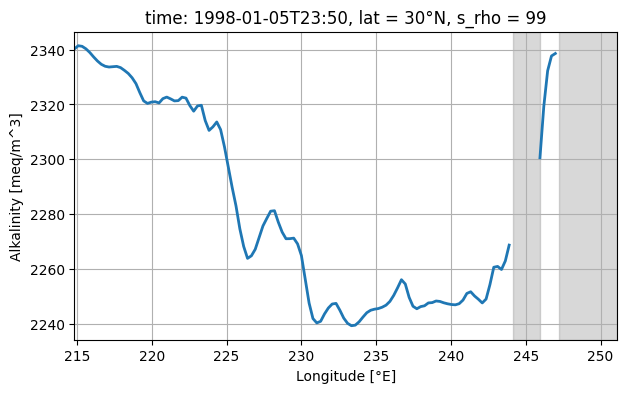

In [23]:
roms_output.plot("ALK", time=0, lat=30, s=-1)  # first available time stamp